# HALEEMA SADIA

# Iris Flower Classification
## Task1 - Beginner Level


In [46]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
#load the iris Dataset
data = pd.read_csv("iris.data")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Preprocessing

In [4]:
#Renaming the coloumn names
new_column_names = {'5.1': 'SepalLength', '3.5': 'SepalWidth', '1.4': 'PetalLength','0.2': 'PetalWidth','Iris-setosa':'Species'}
data= data.rename(columns=new_column_names)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#Check null values in the dataset
data.isnull().sum()


SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Information About Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(149, 5)

In [9]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

### Correlation 

In [10]:
#corelation matrix for Iris Dataset
corelation_matrix = data.corr()
print(corelation_matrix)

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.103784     0.871283    0.816971
SepalWidth     -0.103784    1.000000    -0.415218   -0.350733
PetalLength     0.871283   -0.415218     1.000000    0.962314
PetalWidth      0.816971   -0.350733     0.962314    1.000000


## Visualizing The Data

### Scatterplot

Text(0, 0.5, 'Sepal Width')

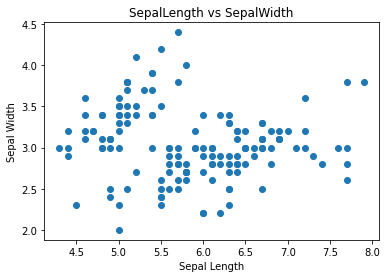

In [11]:
#Scatterplot betweem Sepal Length and Sepal Width to see the pattern/relation
plt.scatter(x=data['SepalLength'],y=data['SepalWidth'])
plt.title("SepalLength vs SepalWidth")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

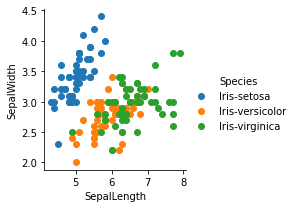

In [12]:
#Scatterplot between Sepal Length and Sepal Width based on Species
sns.FacetGrid(data,hue='Species')\
.map(plt.scatter,'SepalLength','SepalWidth')\
.add_legend()


### Barplot

<AxesSubplot:xlabel='Species', ylabel='count'>

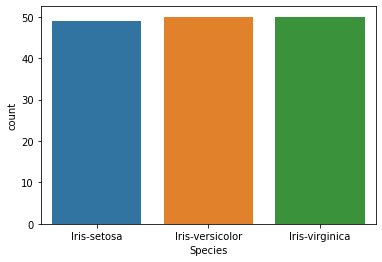

In [13]:
#Barplot for Species count in dataset
sns.countplot(x='Species',data = data)
#This shows that species are equally distributed

### Pairplot

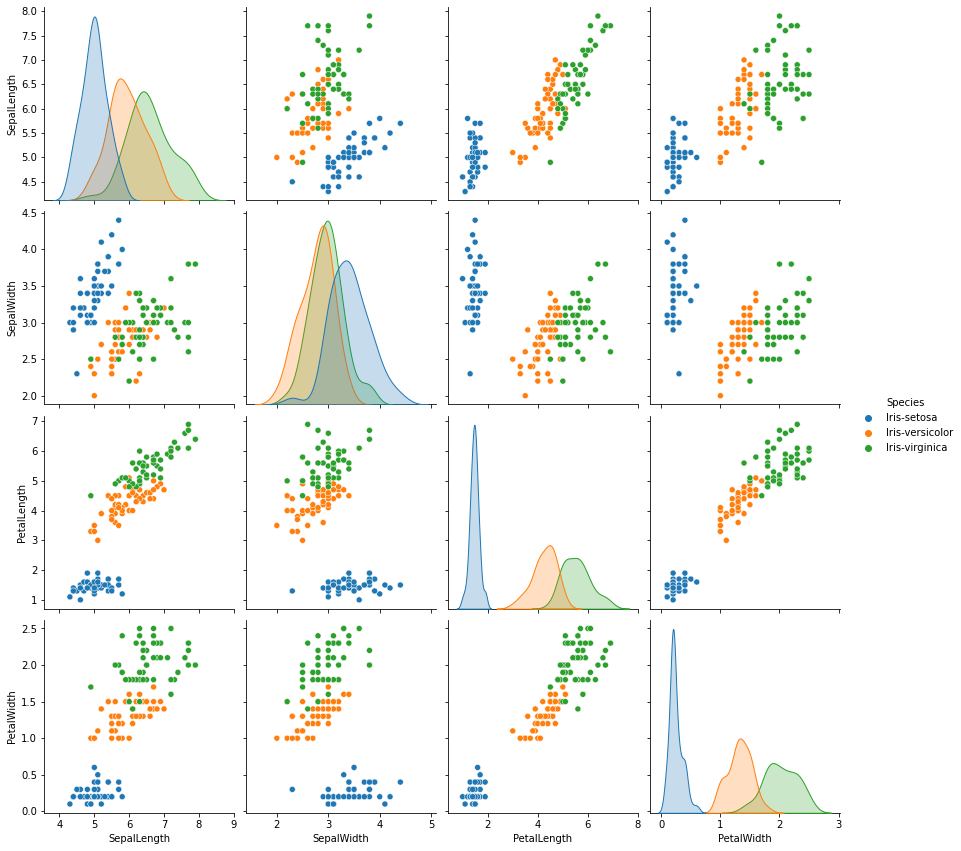

In [14]:
#Creating pairplot for dataset
sns.pairplot(hue ='Species',data=data,height=3)


### HeatMap

<AxesSubplot:>

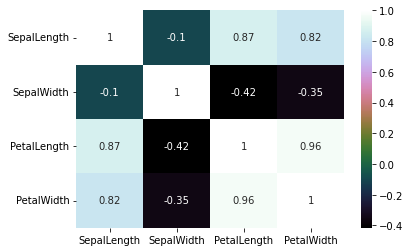

In [15]:
#create a heatmap which shows the correlation of the dataset
sns.heatmap(data.corr(),annot=True,cmap='cubehelix')

## Splitting The data in test and train

In [16]:
X= data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
Y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Decision Tree

Accuracy (Gini impurity): 0.9


[Text(0.4, 0.875, 'X[2] <= 2.45\ngini = 0.666\nsamples = 119\nvalue = [39, 41, 39]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.375, 'X[2] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

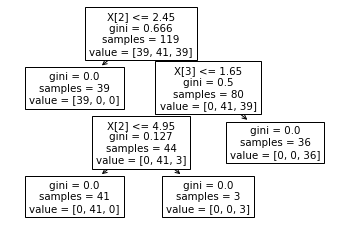

In [34]:
# Create decision tree classifiers using gini impurity measures
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the decision tree classifiers
tree_gini.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_gini.predict(X_test)

# Calculate accuracy scores
accuracy_gini = accuracy_score(y_test, y_pred)

# Print the accuracy scores
print("Accuracy (Gini impurity):", accuracy_gini)
tree.plot_tree(tree_gini)


## Confusion Matrix of Decision Tree

In [38]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


## Plotting Confusion Matrix 

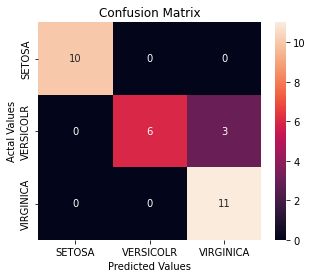

In [45]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report of Decision Tree

In [39]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



### Accuracy Of Decision Tree model is 0.9 or 90 %.


## K-Nearest Neighbour

In [50]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',accuracy_score(prediction,y_test))


The accuracy of the KNN is 0.9333333333333333


## Classification Report of KNN

In [55]:
report = classification_report(y_test, prediction)
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



## Confusion Matrix for KNN

In [56]:
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


## Plotting Confusion matrix

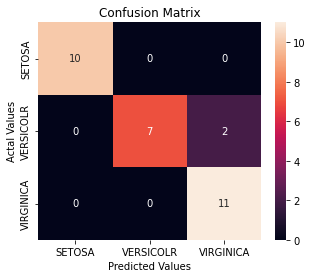

In [57]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Accuracy of KNN is 0.93 or 93%.
### The accuracy of KNN is greater than the accuracy of Decision Tree. Hence Knn better classifies the species.